In [30]:
import pandas as pd
import numpy as np

In [31]:
df_izmir = pd.read_csv('EnergyData/GERCEKZAMANLIURETIM_RUZGAR_SEHIRLER/IZMIR_GercekZamanliUretim-BERGRES-RES-40W000000010903W-01022018-01022021.csv')
df_izmir

,Tarih,Saat,Toplam (MWh),Do�al Gaz,Barajl�,Linyit,Akarsu,�thal K�m�r,R�zgar,G�ne�,Fuel Oil,Jeotermal,Asfaltit K�m�r,Ta� K�m�r,Biyok�tle,Nafta,LNG,Uluslararas�
0,01.02.2018,00:00,"0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
1,01.02.2018,01:00,"1,00","0,00","0,00","0,00","0,00","0,00","1,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
2,01.02.2018,02:00,"5,00","0,00","0,00","0,00","0,00","0,00","5,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
3,01.02.2018,03:00,"6,00","0,00","0,00","0,00","0,00","0,00","6,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
4,01.02.2018,04:00,"9,00","0,00","0,00","0,00","0,00","0,00","9,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26323,01.02.2021,19:00,"68,00","0,00","0,00","0,00","0,00","0,00","68,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
26324,01.02.2021,20:00,"68,00","0,00","0,00","0,00","0,00","0,00","68,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
26325,01.02.2021,21:00,"67,00","0,00","0,00","0,00","0,00","0,00","67,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"
26326,01.02.2021,22:00,"45,00","0,00","0,00","0,00","0,00","0,00","45,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00","0,00"


In [32]:
df_izmir = df_izmir[['Toplam (MWh)']]

In [33]:
df_izmir

,Toplam (MWh)
0,"0,00"
1,"1,00"
2,"5,00"
3,"6,00"
4,"9,00"
...,...
26323,"68,00"
26324,"68,00"
26325,"67,00"
26326,"45,00"


In [34]:
df_data = pd.read_csv('all_in_one_raw.csv')

/home/tbh/anaconda3/envs/data/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (45,51,55,56,57,58,61,62,63,64,65,68,70,72,73,74,103,104,134,135,165,166) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [35]:
df_data['spread'] = df_data['SMF (TL/MWh)'] - df_data['PTF (TL/MWh)Okuma Yukumlulu']    
df_data['target_load'] = df_data['YAL (0) Kodlu (MWh)'] + df_data['YAL (1) Kodlu (MWh)'] + df_data['YAL (2) Kodlu (MWh)'] - df_data['YAL Teslim Edilmeyen (MWh)'] - df_data['YAT (0) Kodlu (MWh)'] - df_data['YAT (1) Kodlu (MWh)'] - df_data['YAT (2) Kodlu (MWh)'] + df_data['YAT Teslim Edilmeyen (MWh)']
df_data = df_data[['target_load']]

In [36]:
df_data

,target_load
0,49.25
1,658.52
2,0.00
3,-788.52
4,-497.19
...,...
26323,42.33
26324,71.76
26325,0.00
26326,808.70


In [37]:
df_izmir = df_izmir[['Toplam (MWh)']]
df_izmir = df_izmir.stack().str.replace(',','.').unstack()
df_izmir = df_izmir.astype('float64')


#cp = constant = 0.4 
#rho = constant = 1.24
#swept area(izmir enercon: E82) = 8322 m^2
#number of turbines = 12
def windVelocity(p , numberOfTurbines,cp,rho,swept):
    den = cp*rho*swept
    num = 2*(p / numberOfTurbines)*10**6
    v = num/den
    v = v**(1./3)
    return v

cp = 0.4
rho = 1.24
swept = 8322
numberOfTurbines =22
results = []
for i , j  in df_izmir.iterrows():
    results.append(windVelocity(j['Toplam (MWh)'],numberOfTurbines,cp,rho, swept))
results = np.array(results)

df_data['Windspeed(m/s)'] = results
df_data.head()

<ipython-input-37-0343412073f0>:14: RuntimeWarning: invalid value encountered in double_scalars
  v = v**(1./3)


,target_load,Windspeed(m/s)
0,49.25,0.000000
1,658.52,2.803062
2,0.00,4.793168
3,-788.52,5.093501
4,-497.19,5.830603


<AxesSubplot:ylabel='Frequency'>

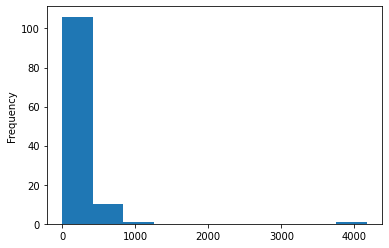

In [66]:
df_data['Windspeed(m/s)'].value_counts().plot(kind = 'hist')

<AxesSubplot:xlabel='Windspeed(m/s)'>

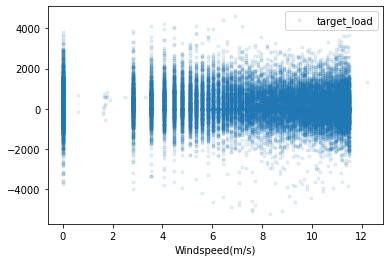

In [51]:
df_data.plot(x='Windspeed(m/s)', y='target_load', style='.' , alpha = 0.1)


In [67]:
# safe to assume that no correlation exists between wind speed and target_load!